In [1]:
import toyplot

import numpy as np
import librosa
import os
import sys

lib_dir = os.path.join(os.getcwd(), "..", "preprocessing")
sys.path.insert(0, lib_dir)

import audio
import graphic
from preprocessing_commons import apply_melfilter, generate_spectrograms, read_wav_dirty, sliding_audio, downsample

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
ROOT = "/Users/tomherold/datasets/news"
TEST_FILES = [
   os.path.join(ROOT, "english", "bbcnews", "55th anniversary of Yuri Gagarin’s space flight - BBC News.wav"),
   os.path.join(ROOT, "english", "bbcnews", "65 years, 1 Queen and 12 US presidents - BBC News.wav"),
   os.path.join(ROOT, "english", "bbcnews", "A celebration of cycling – the glamour and the grit - BBC News.wav"),
   os.path.join(ROOT, "german", "deutschewelle", "_British_Shops__vor_dem_Aus_in_Deutschland___Fokus_Europa.mp3.wav"),
   os.path.join(ROOT, "german", "deutschewelle", "_My_Euro___Fastfood_fu_r_die_Fans___DW_Nachrichten.mp3.wav"),
   os.path.join(ROOT, "german", "deutschewelle", "_Olympiade_der_Kunst____die_Art_Basel___Euromaxx.mp3.wav"),
]

In [3]:
def print_summary(x):
    print "min: {0}, max: {1}, mean: {2}, shape: {3}, dtype: {4}".format(np.min(x), np.max(x), np.mean(x), x.shape, x.dtype)

In [4]:
def mel_librosa():
    for i, filename in enumerate(TEST_FILES):

        signal, samplingrate = librosa.core.load(filename)
        mel_spectrogram = librosa.feature.melspectrogram(signal, samplingrate, n_mels=39, n_fft=512, hop_length=512)
        log_mel_spectrogram = librosa.logamplitude(mel_spectrogram, ref_power=np.max)

        print librosa.core.get_duration(signal), samplingrate
        print_summary(log_mel_spectrogram)

        fig = plt.figure()
        librosa.display.specshow(log_mel_spectrogram, y_axis='mel', fmax=8000, x_axis='time', cmap='gray_r')
        plt.colorbar(format='%+2.0f dB')
        plt.title('Mel spectrogram')
        plt.tight_layout()

        fig.savefig("librosa_{0}.png".format(i)) #.astype("uint8")

In [5]:
def mel_homebrew():
    
    for i, filename in enumerate(TEST_FILES):
        
        f, signal, samplerate = read_wav_dirty(filename)
        #segments = sliding_audio(f, signal, samplerate)

        #for (filename, signal, samplerate) in segments:
        _, signal, samplerate = downsample(filename, signal, samplerate)

        _, mel_image = apply_melfilter(filename, signal, samplerate)

        print samplerate
        print_summary(mel_image)



        fig = plt.figure()
        librosa.display.specshow(mel_image, y_axis='mel', fmax=8000, x_axis='time', cmap='gray_r')
        plt.colorbar(format='%+2.0f dB')
        plt.title('Mel spectrogram')
        plt.tight_layout()
        fig.savefig("homebrew_{0}.png".format(i)) #.astype("uint8")
        
        mel_image = graphic.colormapping.to_grayscale(mel_image, bytes=True)
        mel_image = graphic.histeq.histeq(mel_image)
        
        fig = plt.figure()
        librosa.display.specshow(mel_image, y_axis='mel', fmax=8000, x_axis='time', cmap='gray_r')
        plt.colorbar(format='%+2.0f dB')
        plt.title('Mel spectrogram')
        plt.tight_layout()
        fig.savefig("homebrew_{0}_{1}.png".format(i,i)) #.astype("uint8")
        
#     mel_image = graphic.histeq.clamp_and_equalize(mel_image)
#     mel_image = graphic.windowing.cut_or_pad_window(mel_image, window_size)

74.2109750567 22050
min: -80.0, max: 0.0, mean: -53.5468662957, shape: (40, 3197), dtype: float64
115.456145125 22050
min: -80.0, max: 0.0, mean: -49.8396488718, shape: (40, 4973), dtype: float64
143.296870748 22050
min: -80.0, max: 0.0, mean: -55.1255954912, shape: (40, 6172), dtype: float64
249.961043084 22050
min: -80.0, max: 0.0, mean: -50.1570366359, shape: (40, 10765), dtype: float64
88.9219501134 22050
min: -80.0, max: 0.0, mean: -52.4626988326, shape: (40, 3830), dtype: float64
274.561043084 22050
min: -80.0, max: 0.0, mean: -44.0487874223, shape: (40, 11825), dtype: float64


/usr/local/lib/python2.7/site-packages/scipy/signal/signaltools.py:1741: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  Y = zeros(newshape, 'D')


16000
min: -16.736562599, max: 19.0533891043, mean: 9.27539672198, shape: (39, 17856), dtype: float64
16000
min: -10.8968887204, max: 20.6482700252, mean: 10.741361134, shape: (39, 13890), dtype: float64
16000
min: -11.4760803739, max: 20.3488489828, mean: 10.1219971848, shape: (39, 34478), dtype: float64
16000
min: -36.0436533891, max: 20.2452444048, mean: 9.18373633519, shape: (39, 30071), dtype: float64
16000
min: -36.0436533891, max: 18.4287414354, mean: 7.83880681747, shape: (39, 10698), dtype: float64
16000
min: -36.0436533891, max: 20.126565527, mean: 10.0621518189, shape: (39, 33030), dtype: float64


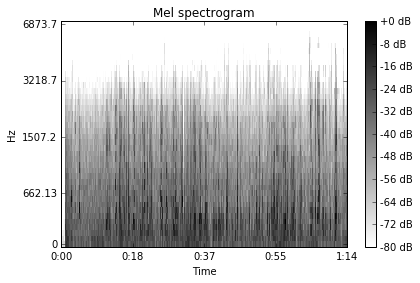

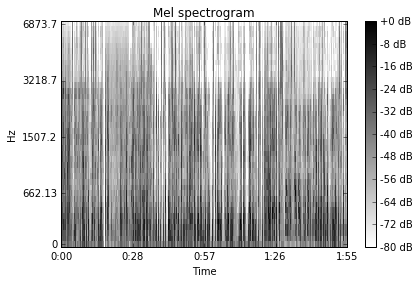

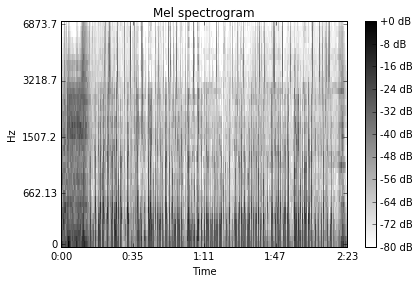

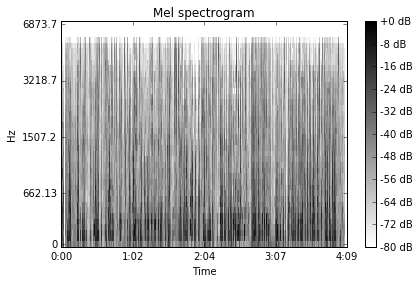

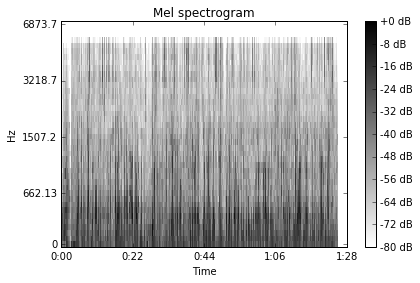

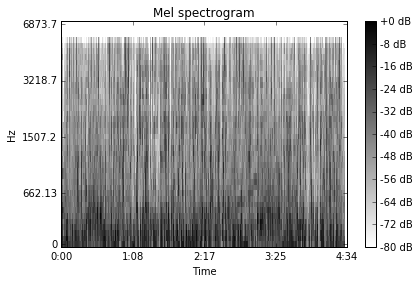

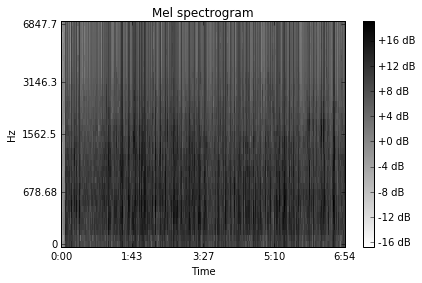

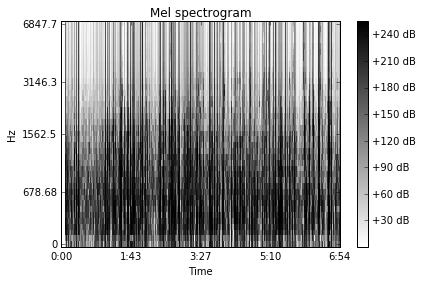

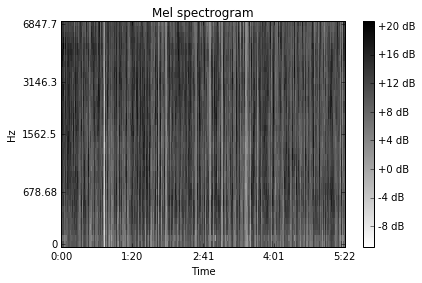

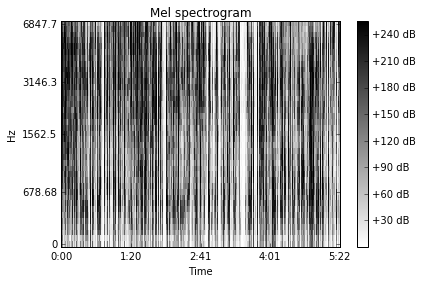

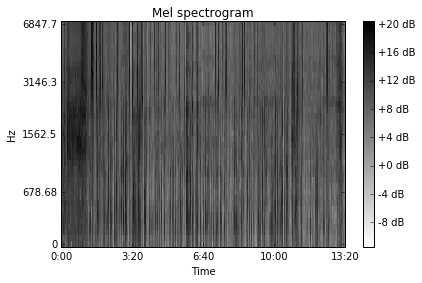

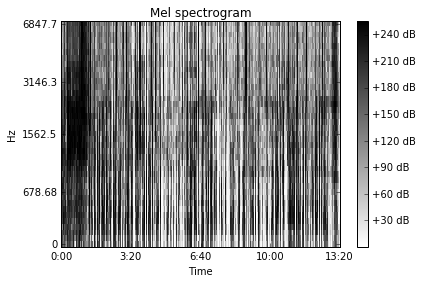

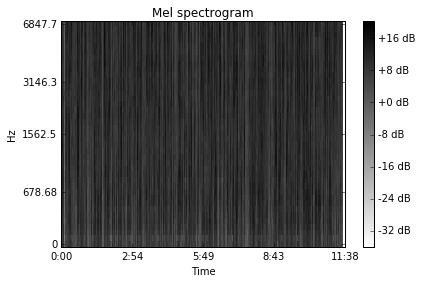

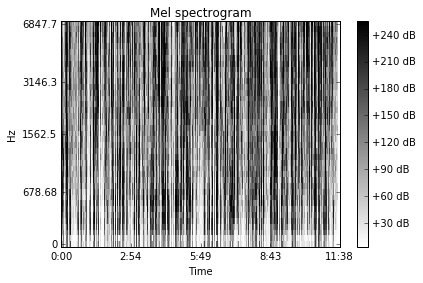

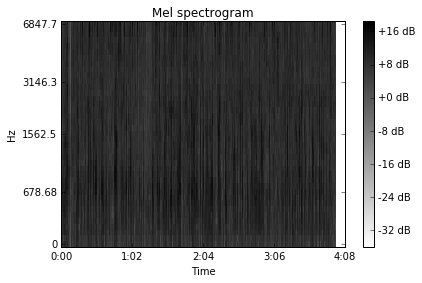

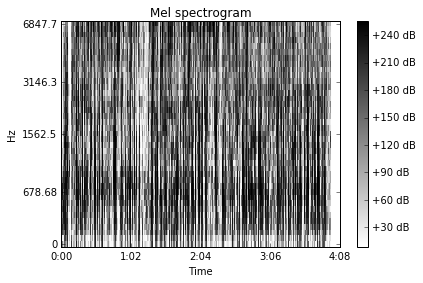

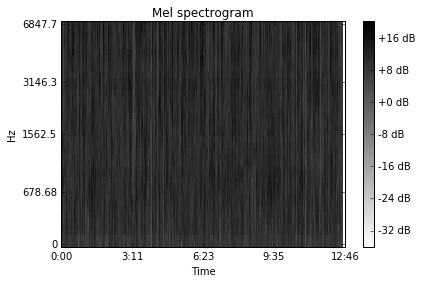

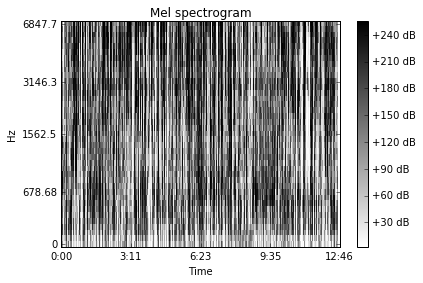

In [6]:
mel_librosa()
mel_homebrew()